In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

In [2]:
def mostrar(imagen, color="gray", ejes="off"):
    plt.imshow(imagen, color)
    plt.axis(ejes)
    plt.show()

In [3]:
caballo = data.horse()

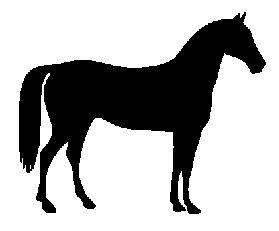

In [4]:
mostrar(caballo)

In [5]:
caballo.shape

(328, 400)

In [6]:
from skimage import measure

In [7]:
contornos = measure.find_contours(caballo, 0.5)

In [8]:
contornos

[array([[312. , 287.5],
        [311.5, 288. ],
        [311.5, 289. ],
        ...,
        [312.5, 286. ],
        [312.5, 287. ],
        [312. , 287.5]]),
 array([[244.5,  35. ],
        [244. ,  34.5],
        [243. ,  34.5],
        [242. ,  34.5],
        [241. ,  34.5],
        [240. ,  34.5],
        [239. ,  34.5],
        [238.5,  35. ],
        [239. ,  35.5],
        [240. ,  35.5],
        [241. ,  35.5],
        [242. ,  35.5],
        [243. ,  35.5],
        [244. ,  35.5],
        [244.5,  35. ]])]

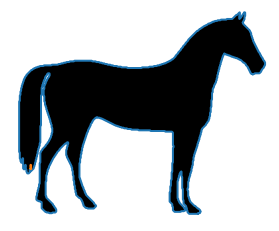

In [9]:
fig, ax = plt.subplots()
ax.imshow(caballo, "gray")

for n, contorno in enumerate(contornos):
    ax.plot(contorno[:, 1], contorno[:, 0], linewidth = 2)

ax.axis("off")
plt.show()

In [10]:
dados = plt.imread("dados.png")

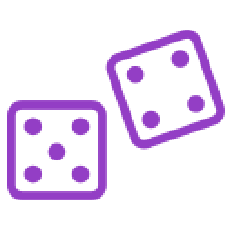

In [11]:
mostrar(dados)

In [12]:
dados.shape

(120, 120, 4)

In [13]:
dados_gris = color.rgb2gray(dados)

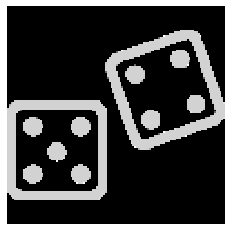

In [14]:
mostrar(dados_gris)

In [15]:
from skimage.filters import threshold_otsu

In [16]:
thresh = threshold_otsu(dados_gris)

In [17]:
dados_binario = dados_gris > thresh

In [18]:
contornos_dados = measure.find_contours(dados_binario, 0.5)

In [19]:
def mostrar_contornos(imagen, contornos):
    fig, ax = plt.subplots()
    ax.imshow(imagen, "gray")

    for n, contorno in enumerate(contornos):
        ax.plot(contorno[:, 1], contorno[:, 0], linewidth = 2)

    ax.axis("off")
    plt.show()

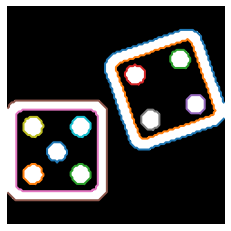

In [20]:
mostrar_contornos(dados_binario, contornos_dados)

In [21]:
for cont in contornos_dados:
    print(cont.shape)

(255, 2)
(221, 2)
(43, 2)
(45, 2)
(41, 2)
(173, 2)
(181, 2)
(43, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)


In [22]:
contornos_dados[0].shape

(255, 2)

In [23]:
# suma de puntos de los dado
puntos = [cont for cont in contornos_dados if np.shape(cont)[0] < 50]
print("la suma de los puntos de los dados es : {}" .format(len(puntos)))

la suma de los puntos de los dados es : 9


In [24]:
monedas = data.coins()

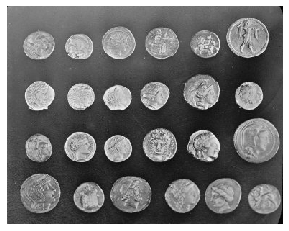

In [25]:
mostrar(monedas)

In [26]:
monedas_gris = color.rgb2gray(monedas)

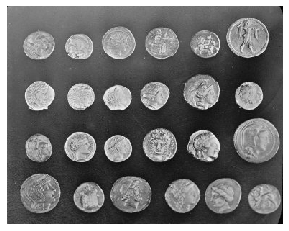

In [27]:
mostrar(monedas_gris)

In [28]:
from skimage.feature import canny

In [29]:
monedas_canny = canny(monedas_gris)

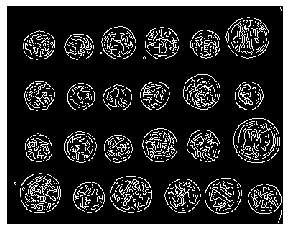

In [30]:
mostrar(monedas_canny)

In [31]:
monedas_canny_18 = canny(monedas_gris, sigma=1.8)

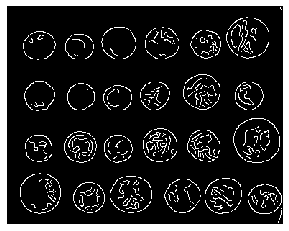

In [32]:
mostrar(monedas_canny_18)

In [33]:
monedas_canny_22 = canny(monedas_gris, sigma=2.2)

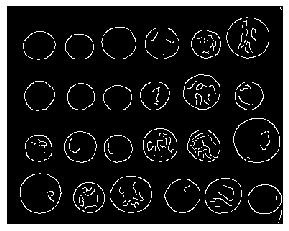

In [34]:
mostrar(monedas_canny_22)

In [35]:
monedas_canny_4 = canny(monedas_gris, sigma=4)

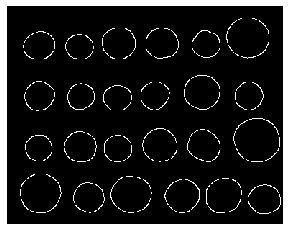

In [36]:
mostrar(monedas_canny_4)

In [37]:
from skimage.feature import corner_harris

In [38]:
edificio = plt.imread("edificio.jpg")

In [39]:
edificio_gris = color.rgb2gray(edificio)

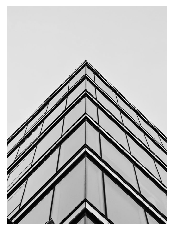

In [40]:
mostrar(edificio_gris)

In [41]:
edificio_aprox = corner_harris(edificio_gris)

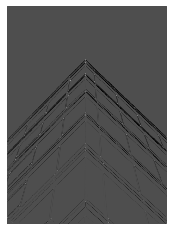

In [42]:
mostrar(edificio_aprox)

In [43]:
from skimage.feature import corner_peaks

In [44]:
coordenadas = corner_peaks(edificio_aprox, min_distance=2)

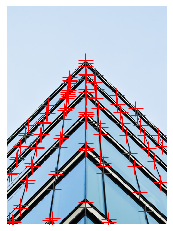

In [45]:
plt.imshow(edificio, cmap="gray")
plt.plot(coordenadas[:, 1], coordenadas[:, 0], '+r', markersize=15)
plt.axis("off")
plt.show()

In [46]:
astronauta = data.astronaut()[:400, :400]

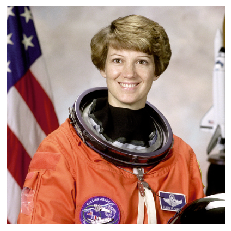

In [47]:
mostrar(astronauta)

In [48]:
astronauta.shape

(400, 400, 3)

In [49]:
from skimage.feature import Cascade

In [50]:
archivo_entrenado = data.lbp_frontal_face_cascade_filename()

In [51]:
detector = Cascade(archivo_entrenado)

In [52]:
detectar = detector.detect_multi_scale(img=astronauta, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10,10), 
                                       max_size=(300,300))

In [53]:
detectar

[{'r': 71, 'c': 177, 'width': 85, 'height': 85}]

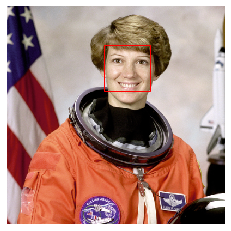

In [54]:
import matplotlib.patches as patches
plt.imshow(astronauta)
img_desc = plt.gca()
plt.set_cmap("gray")
plt.axis("off")

for resultado in detectar:
    img_desc.add_patch(patches.Rectangle(
        (resultado['c'], resultado['r']),
         resultado['width'], 
         resultado['height'],
        fill=False,
        color='r'
    ))
plt.show()

In [55]:
caras = plt.imread("foto_caras.jpg")

In [56]:
detectar_varios = detector.detect_multi_scale(img=caras, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10,10), 
                                       max_size=(200,200))

In [57]:
detectar_varios

[{'r': 202, 'c': 31, 'width': 36, 'height': 36},
 {'r': 202, 'c': 402, 'width': 45, 'height': 45},
 {'r': 207, 'c': 152, 'width': 47, 'height': 47},
 {'r': 217, 'c': 311, 'width': 39, 'height': 39},
 {'r': 219, 'c': 533, 'width': 48, 'height': 48},
 {'r': 218, 'c': 440, 'width': 52, 'height': 52},
 {'r': 242, 'c': 237, 'width': 41, 'height': 41}]

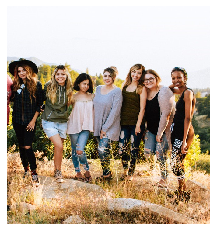

In [58]:
mostrar(caras)

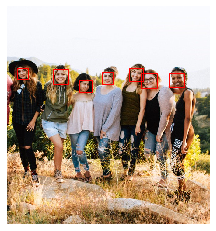

In [59]:
import matplotlib.patches as patches
plt.imshow(caras)
img_desc = plt.gca()
plt.set_cmap("gray")
plt.axis("off")

for resultado in detectar_varios:
    img_desc.add_patch(patches.Rectangle(
        (resultado['c'], resultado['r']),
         resultado['width'], 
         resultado['height'],
        fill=False,
        color='r'
    ))
plt.show()